In [1]:
import sys, h5py, pdb,time, glob
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log
from astropy import units as un, constants as cons
import scipy, scipy.stats
from matplotlib import ticker
sys.path.append('../pysrc')

In [2]:
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
cmap = pl.get_cmap('viridis')

Behroozi+18 not loaded


In [3]:
simnames = [x.split('/')[-1] for x in glob.glob('../../data/vc*')]

In [8]:
sims = []
for simname in simnames:
    vc = float(simname.split('_')[0][2:])
    PL_potential = l.PowerLawPotential(m=0.,vc_Rvir=vc*un.km/un.s,Rvir=200*un.kpc)
    Rcirc = float(simname.split('_')[3][5:])
    simdir = '../../data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,
                   dynamicCentering=True,recalc=False,Nsnapshots=None,
                   origin=np.zeros(3),Rcirc = Rcirc*un.kpc,
                   analyticGravity=PL_potential)
    print(sim.galaxyname, sim.Nsnapshots())
    sims.append(sim)

loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs30_Mdot1730_Rcirc10_turb 2001
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs0_Mdot110_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot137_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs0_Mdot535_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot1121_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs3_Mdot841_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs0_Mdot3859_Rcirc10 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot137_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0, Masses
vc150_Rs3_Mdot7470_Rcirc1 263
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs30_Mdot1730_Rcirc10_turb_mag 2001
loaded PartType0, Coordinates
loaded PartType0, Masses
vc100_Rs3_Mdot1121_Rcirc1 401
loaded PartType0, Coordinates
loaded PartType0,

../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]
../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np

../pysrc/FIRE_files.py:89: RuntimeWarning: divide by zero encountered in log10
  f_H_He((log(T), log(nH))) + f_Z((log(T), log(nH))) * Z2Zsun )
/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/interpolate/interpolate.py:2546: RuntimeWarning: invalid value encountered in add
  values += np.asarray(self.values[edge_indices]) * weight[vslice]


KeyboardInterrupt: 

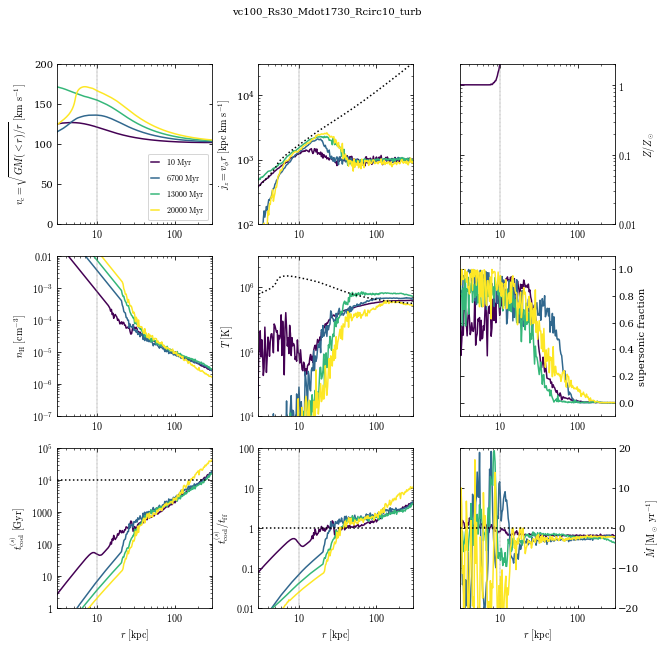

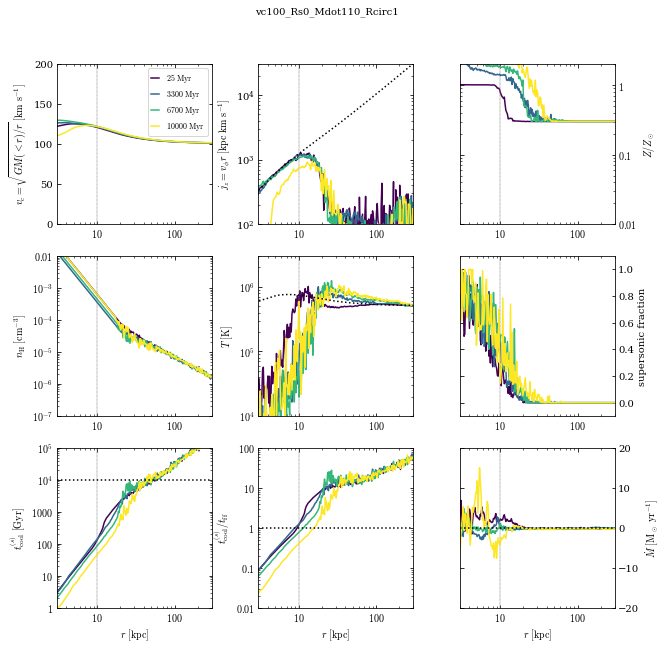

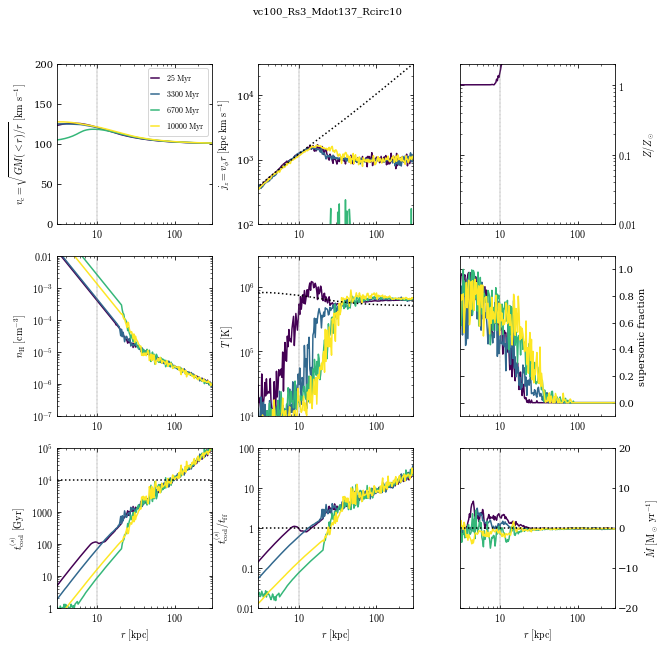

In [9]:
for sim in sims:
    iSnapshots = np.linspace(1,sim.Nsnapshots()-1,4).astype(int)
    l.CGM_properties(sim, iSnapshots,Rcirc=10)

progress:  99% 413 seconds passed
starting snapshot #400,   process id: 1567
loaded PartType0, Coordinates
loaded PartType0, Masses
loaded PartType0, Coordinates
loaded PartType0, Masses
loaded PartType1, Masses
loaded PartType2, Masses
loaded PartType4, Masses
ending snapshot #400,   process id: 1567



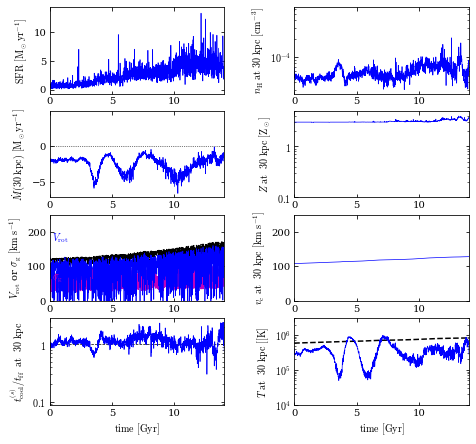

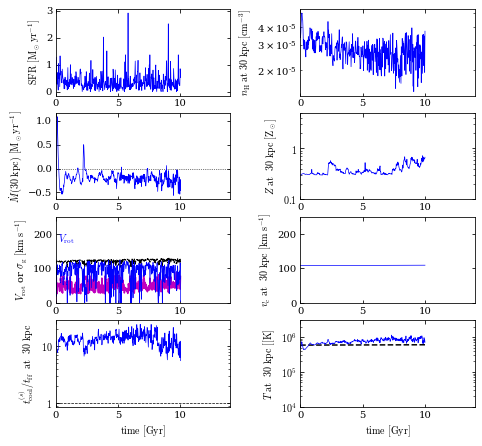

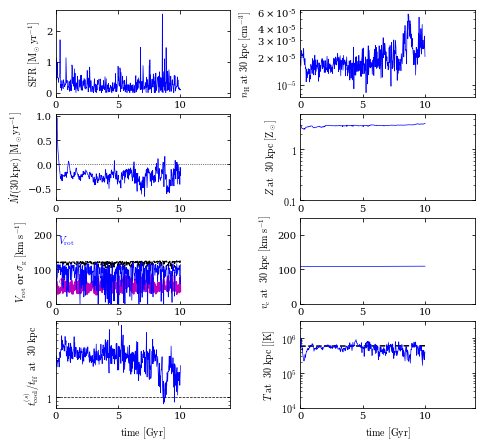

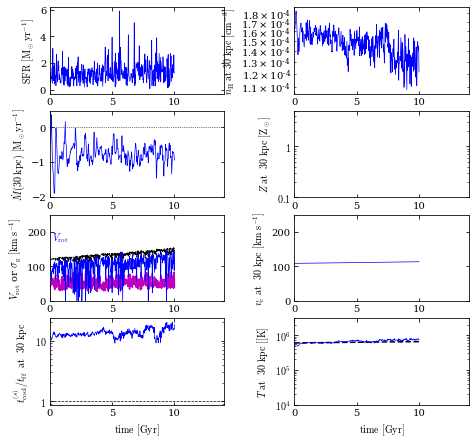

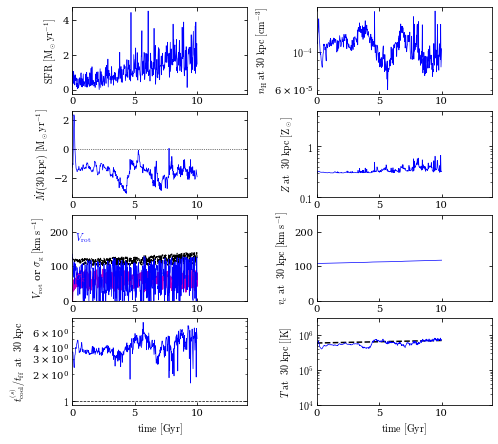

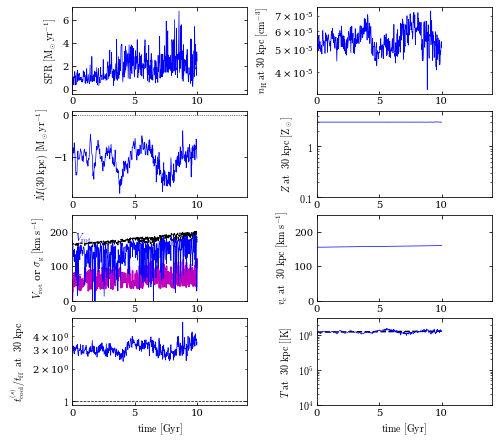

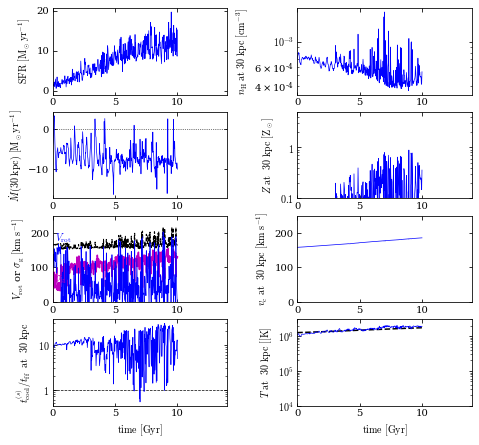

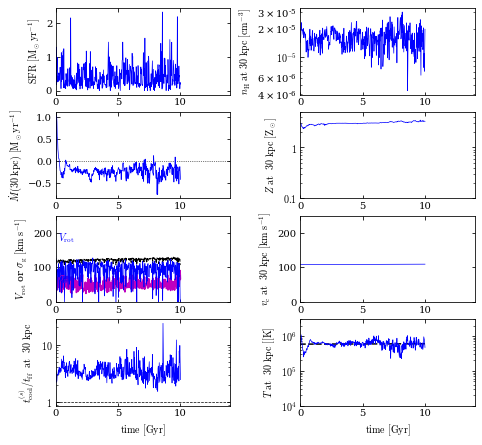

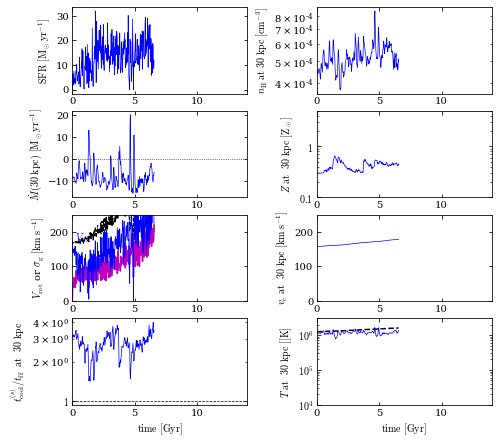

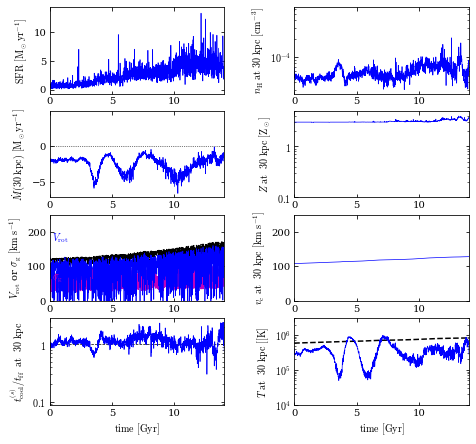

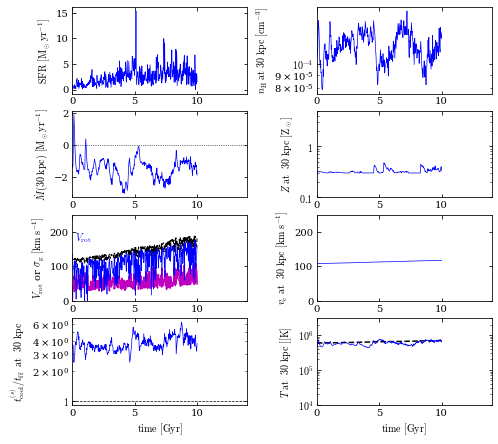

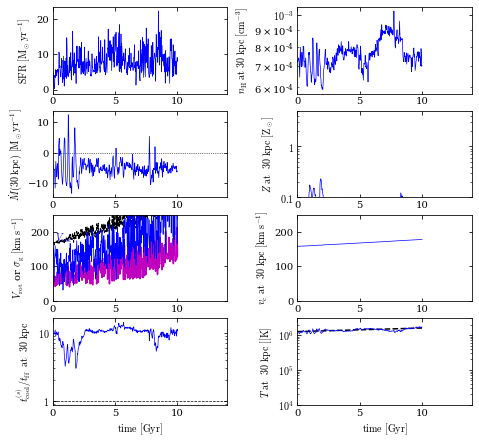

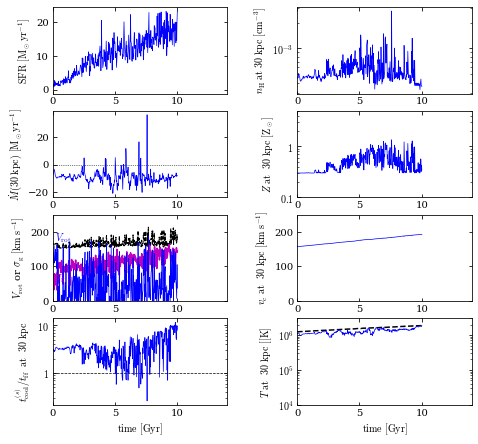

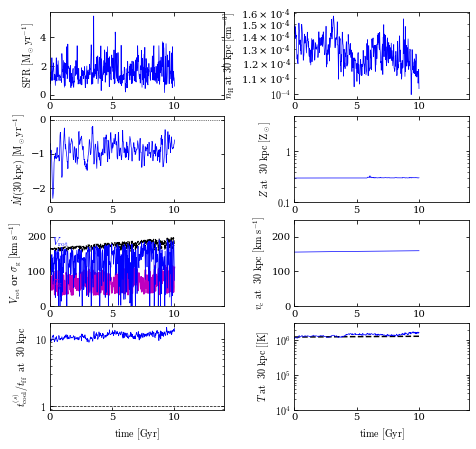

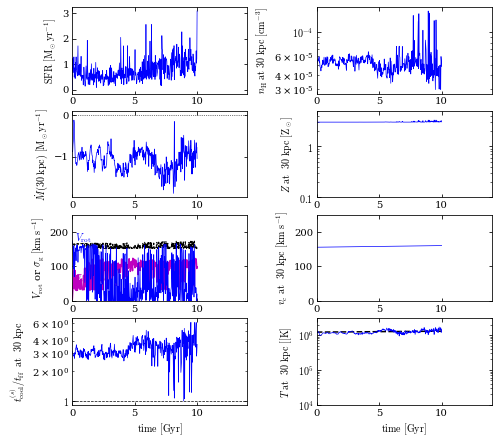

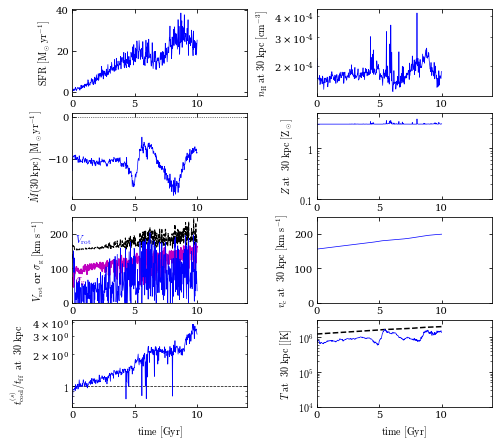

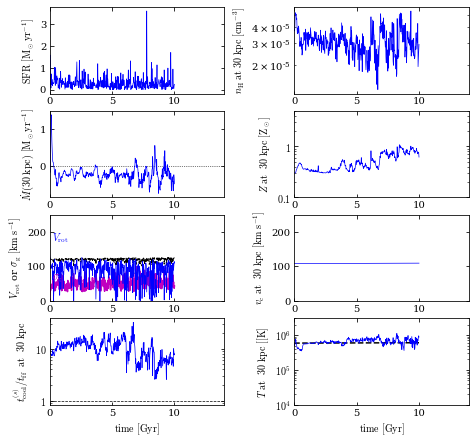

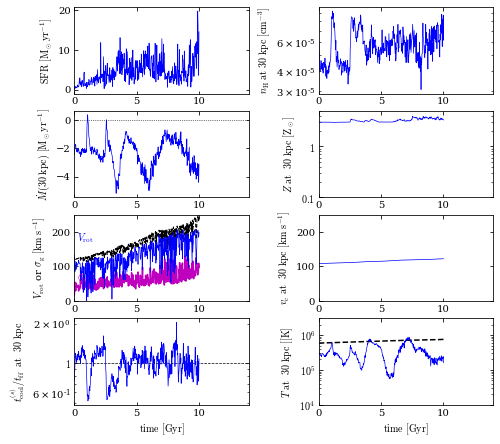

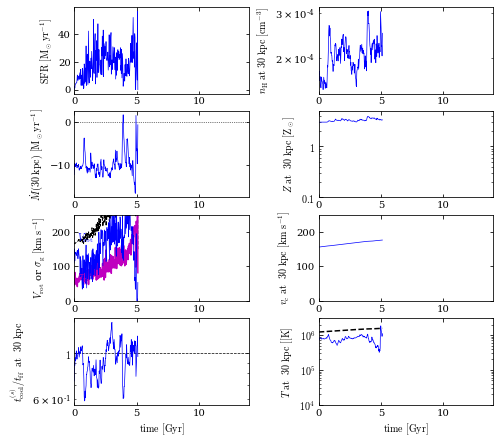

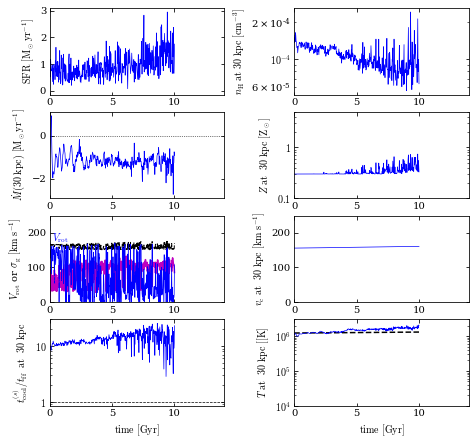

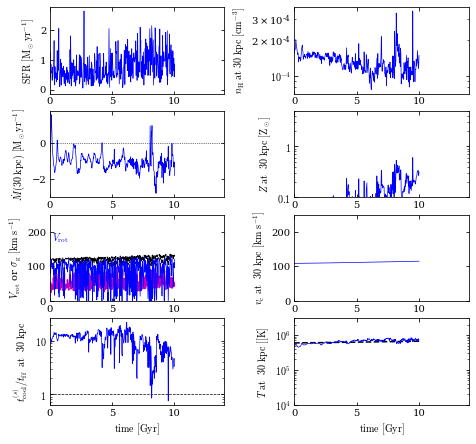

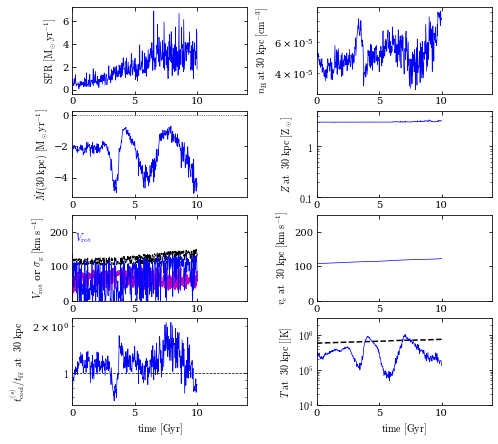

In [10]:
reload(l); reload(l.ff); reload(ff)
for sim in sims:
    _ = sim.timeSeries(rMdot = 30*un.kpc,rVrot=5*un.kpc,multipleProcs=10,justLoad=False)
    sim.quantities_at_Rcirc()

In [110]:
for sim in sims:
    print(sim)
    for edge_on in (True,False):
        for iSnapshot in range(sim.Nsnapshots()):
            l.temperature_and_pressure_movieFrame_async(sim.loadvals,iSnapshot,
            calculateProjections=True,edge_on=edge_on,lazy=True)

vc100_Rs0_Mdot110_Rcirc1
starting snapshot #0,   process id: 1567
loaded PartType0, Coordinates
loaded PartType0, Masses
loaded PartType0, InternalEnergy
loaded PartType0, SmoothingLength


Traceback (most recent call last):
  File "../pysrc/first_pass.py", line 461, in temperature_and_pressure_movieFrame_async
    overwrite=True,pixels=400)
  File "../pysrc/first_pass.py", line 128, in __init__
    self.mystudio = GasStudio(
NameError: name 'GasStudio' is not defined


NameError: name 'GasStudio' is not defined

In [107]:
for sim in sims:
    for edge_on in (True,False):
        sim.movie(l.temperature_and_pressure_movieFrame_async,
              multipleProcs=2,
              calculateProjections=True,start=None,
              edge_on=edge_on,
              lazy=True)